# Correlation Matrix for currency timeseries deltas

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections

Below timeseries data is read. Each value denotes the amount of the currency in that row one would exchange for 1USD

In [2]:
data = pd.read_csv("currency_exchange.csv")
data.drop(['FREQUENCY','MEASURE', 'INDICATOR', 'SUBJECT', 'Flag Codes'], axis=1, inplace = True)

In [3]:
def df_loc(location, df = data):
    return df[df.LOCATION == location]

def relative_prices_timeseries_plot(Locations, base_year = 2000, df = data):
    base_index = base_year - 2000
    plt.figure(figsize = (10,15))
    for loca in Locations:
        df_local = df_loc(loca, df = df).reset_index()
        df_local['Base_2000_value'] = 1/(df_local['Value']/(df_local.Value[base_index]))
        plt.plot(df_local['TIME'], df_local['Base_2000_value'], label = loca)
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Base_2000_value_against_dollar')
    return None

def values_to_deltas_series(location, df = data):
    df = df_loc(location, df = df).copy()
    return df.Value.diff()

def values_to_deltas(location, df = data):
    df = df_loc(location, df = df).copy()
    df['Delta_values'] = df.Value.diff()
    return df

def delta_correlation_gen(loc1, loc2):
    s_loc1 = values_to_deltas_series(loc1).dropna()
    s_loc2 = values_to_deltas_series(loc2).dropna()
    return np.corrcoef(s_loc1, s_loc2)
    
def delta_correlation_matrix(Locations):
    to_be_array = []
    for loca in Locations:
        to_be_array.append(values_to_deltas_series(loca).dropna().tolist())
    _input = np.array(to_be_array)
    matrix = np.corrcoef(_input)
    return pd.DataFrame(matrix, index = Locations, columns = Locations)
        

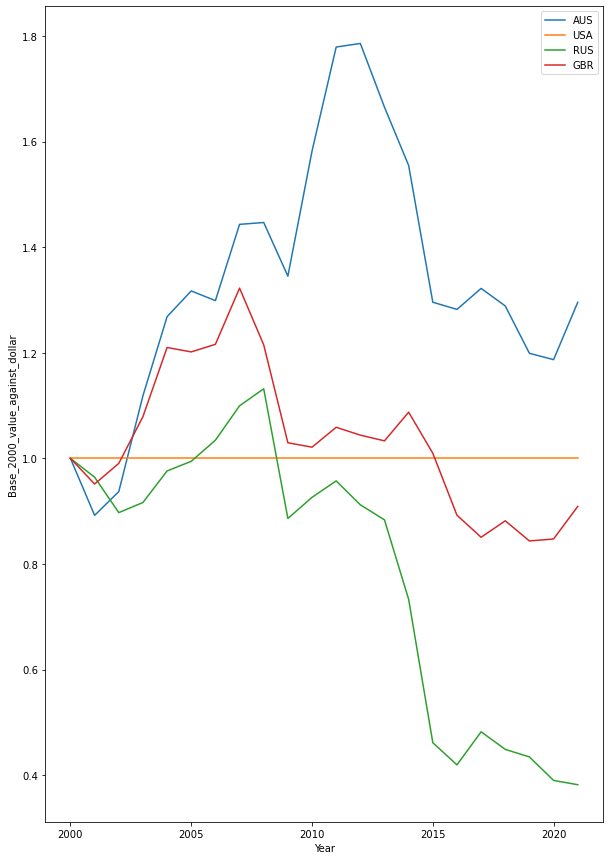

In [4]:
relative_prices_timeseries_plot(['AUS','USA','RUS','GBR'])

In [5]:
delta_correlation_gen('AUS', 'GBR')

array([[1.        , 0.62521337],
       [0.62521337, 1.        ]])

In [6]:
delta_correlation_matrix(['AUS','GBR','RUS'])

,AUS,GBR,RUS
AUS,1.000000,0.625213,0.574978
GBR,0.625213,1.000000,0.308437
RUS,0.574978,0.308437,1.000000


In [7]:
locs = data.LOCATION.unique().tolist()
locs.remove('USA')
delta_correlation_matrix(locs)

C:\Users\Jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,AUS,AUT,BEL,CAN,CZE,DNK,FIN,FRA,DEU,GRC,...,MAR,ZMB,SRB,HKG,EU27_2020,ALB,SGP,GEO,CMR,SEN
AUS,1.000000,0.742873,0.742873,0.882549,0.674660,0.749561,0.742873,0.742873,0.742873,0.752382,...,0.770285,0.320829,0.469468,-0.165203,0.742873,0.608219,0.749155,0.563550,0.744300,0.744300
AUT,0.742873,1.000000,1.000000,0.699306,0.863371,0.999581,1.000000,1.000000,1.000000,0.999392,...,0.976887,0.253401,0.837093,-0.120801,1.000000,0.913089,0.592587,0.648099,0.999948,0.999948
BEL,0.742873,1.000000,1.000000,0.699306,0.863371,0.999581,1.000000,1.000000,1.000000,0.999392,...,0.976887,0.253401,0.837093,-0.120801,1.000000,0.913089,0.592587,0.648099,0.999948,0.999948
CAN,0.882549,0.699306,0.699306,1.000000,0.656406,0.706003,0.699306,0.699306,0.699306,0.702447,...,0.733508,0.433000,0.480644,-0.169183,0.699306,0.659270,0.788062,0.649356,0.701130,0.701130
CZE,0.674660,0.863371,0.863371,0.656406,1.000000,0.859186,0.863371,0.863371,0.863371,0.858790,...,0.801339,0.381169,0.741821,-0.242086,0.863371,0.800273,0.591033,0.624390,0.864379,0.864379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ALB,0.608219,0.913089,0.913089,0.659270,0.800273,0.911919,0.913089,0.913089,0.913089,0.908813,...,0.897616,0.266030,0.822170,-0.242556,0.913089,1.000000,0.527353,0.690310,0.913481,0.913481
SGP,0.749155,0.592587,0.592587,0.788062,0.591033,0.590828,0.592587,0.592587,0.592587,0.601503,...,0.646410,0.499020,0.532281,-0.261679,0.592587,0.527353,1.000000,0.753270,0.593885,0.593885
GEO,0.563550,0.648099,0.648099,0.649356,0.624390,0.647050,0.648099,0.648099,0.648099,0.645756,...,0.639372,0.667448,0.466091,-0.209850,0.648099,0.690310,0.753270,1.000000,0.649465,0.649465
CMR,0.744300,0.999948,0.999948,0.701130,0.864379,0.999654,0.999948,0.999948,0.999948,0.999339,...,0.977657,0.257506,0.837177,-0.126524,0.999948,0.913481,0.593885,0.649465,1.000000,1.000000


In [8]:
aff_matrix = delta_correlation_matrix(locs).fillna(-5)
clustering = AffinityPropagation(random_state = 0, affinity='precomputed').fit(aff_matrix)

C:\Users\Jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Jacob\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [20]:
#Zips are exhausted after one use
labels_locations = [aff_matrix.index[ind] for ind in clustering.labels_]
mapping = dict({
    key_loc: centre_loc for key_loc, centre_loc in zip(aff_matrix, labels_locations)
})

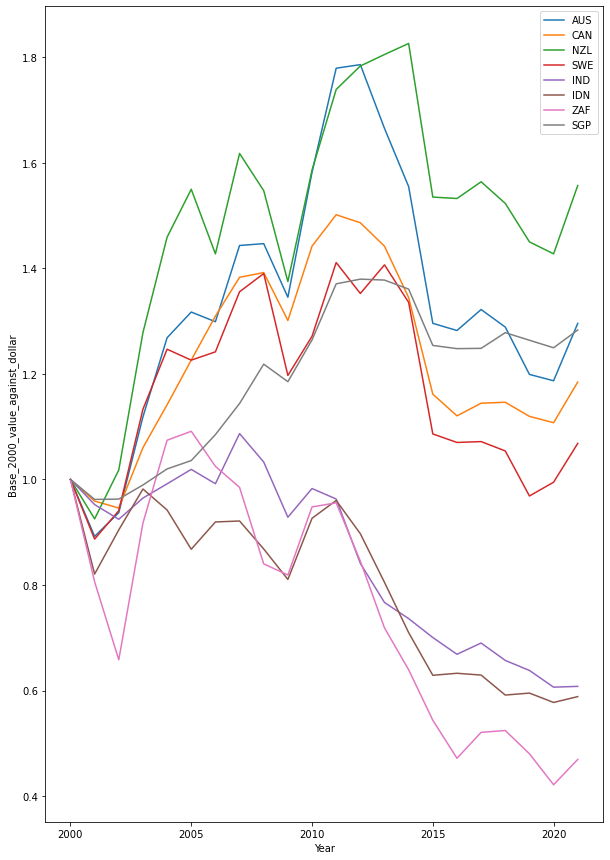

In [26]:
CENTRE = 'AUS'
cluster = [key for key, val in mapping.items() if val == CENTRE]
relative_prices_timeseries_plot(cluster)